<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 20, 2018: collecting from dedicated nbs
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions: <i>Jordan normal forms</i>.
</div>

In [165]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t

from commons import *
from matrix_functions import *
from sequences import *

init_printing()

In [5]:
alpha, beta = IndexedBase(r'\alpha'), IndexedBase(r'\beta')
m=8
Iexp = Matrix(m, m, lambda n, k: factorial(n) if n==k else 0)

---

# Fibonacci generation matrix

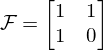

In [6]:
F = define(Symbol(r'\mathcal{F}'), Matrix([
        [1, 1],
        [1, 0],
    ]))
F

In [20]:
m=2
eigendata = spectrum(F)
data, eigenvals, multiplicities = eigendata.rhs
Phi_polynomials = component_polynomials(eigendata)
cmatrices = component_matrices(F, Phi_polynomials)

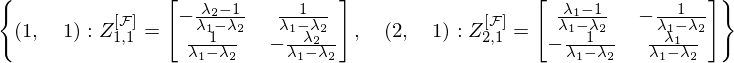

In [8]:
cmatrices

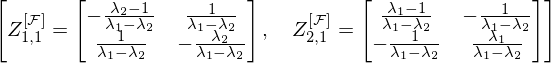

In [9]:
list(cmatrices.values()) # pretty print

In [10]:
M_space_ctor = M_space(cmatrices)
v_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_v = M_space_ctor(v_vector)

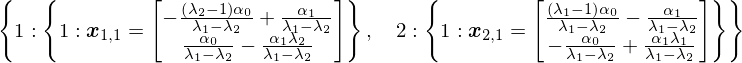

In [11]:
M_space_v

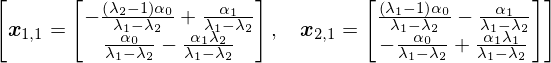

In [12]:
[eq for i, xs in M_space_v.items() for eq in xs.values()] # pretty print

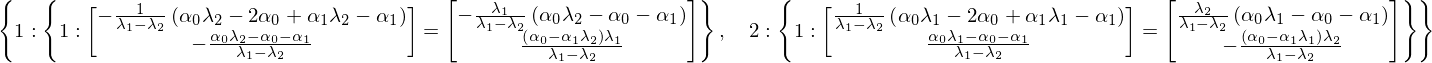

In [13]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(F.rhs, M_space_v,post=lambda i: i.radsimp().factor())
eqs

In [15]:
miniblocks = Jordan_blocks(eigendata)
X, J = Jordan_normalform(eigendata, matrices=(F.rhs, M_space_v, miniblocks))
X_lambda = Lambda(v_vector, X.rhs)

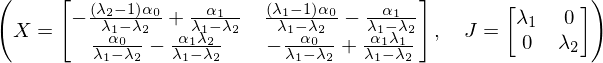

In [16]:
X, J

In [21]:
# FX=XJ
assert ((F.rhs*X.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X.rhs*J.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

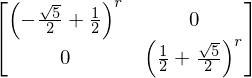

In [22]:
J_pow = Matrix([[lamda_indexed[1]**r, 0],[0, lamda_indexed[2]**r],]).subs(eigenvals)
J_pow

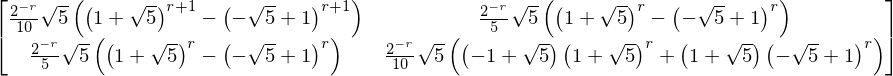

In [23]:
F_pow_r = (F.rhs**r).applyfunc(simplify)
F_pow_r

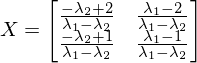

In [24]:
Eq(X.lhs, X.rhs.subs({alpha[0]:1, alpha[1]:1}).applyfunc(simplify), evaluate=False)

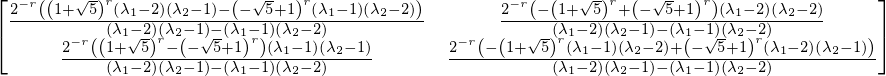

In [25]:
X_Jpow_Xinv = (X.rhs*J_pow*X.rhs**(-1)).subs({alpha[0]:1, alpha[1]:1}).applyfunc(simplify)
X_Jpow_Xinv

In [136]:
# assert F_pow_r.applyfunc(factor) == X_Jpow_Xinv # too general

In [26]:
assert F_pow_r.subs({r:10}).applyfunc(simplify) == (X.rhs*J_pow*X.rhs**(-1)).subs(eigenvals).subs({alpha[0]:1, alpha[1]:t, r:10}).applyfunc(simplify)

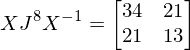

In [27]:
Xsym, Jsym = MatrixSymbol('X',m,m), MatrixSymbol('J',m,m)
Eq(Xsym * Jsym**8 * Xsym**(-1), X_Jpow_Xinv.subs(eigenvals).subs({r:8}).simplify(), evaluate=False)

# $\mathcal{J}$

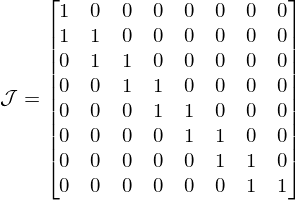

In [28]:
m=8
J = define(Symbol(r'\mathcal{J}'), Matrix(m, m, lambda n, k: 1 if n==k or n==k+1 else 0))
J

In [29]:
eigendata = spectrum(J)
data, eigenvals, multiplicities = eigendata.rhs
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
cmatrices = component_matrices(J, Phi_polynomials)

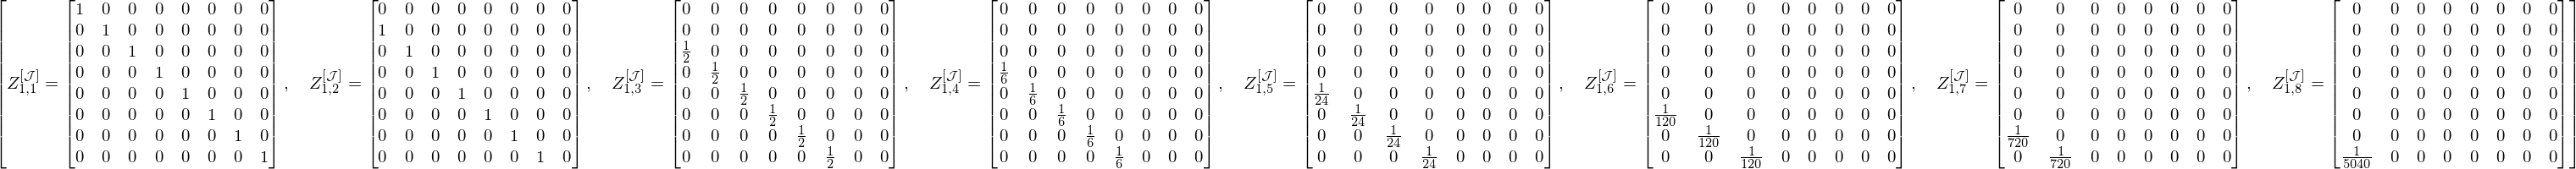

In [30]:
list(cmatrices.values()) # pretty print

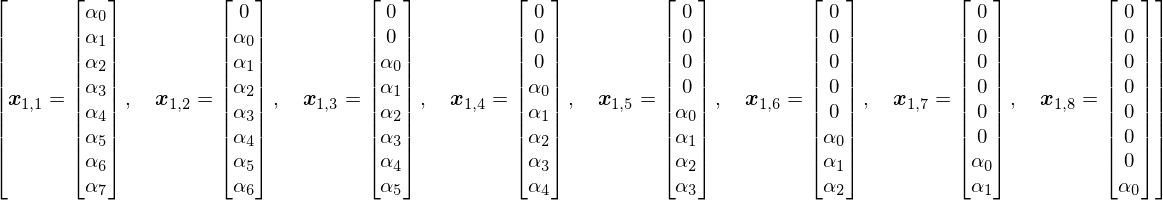

In [31]:
M_space_ctor = M_space(cmatrices)
v_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_v = M_space_ctor(v_vector)
[eq for i, xs in M_space_v.items() for eq in xs.values()] # pretty print

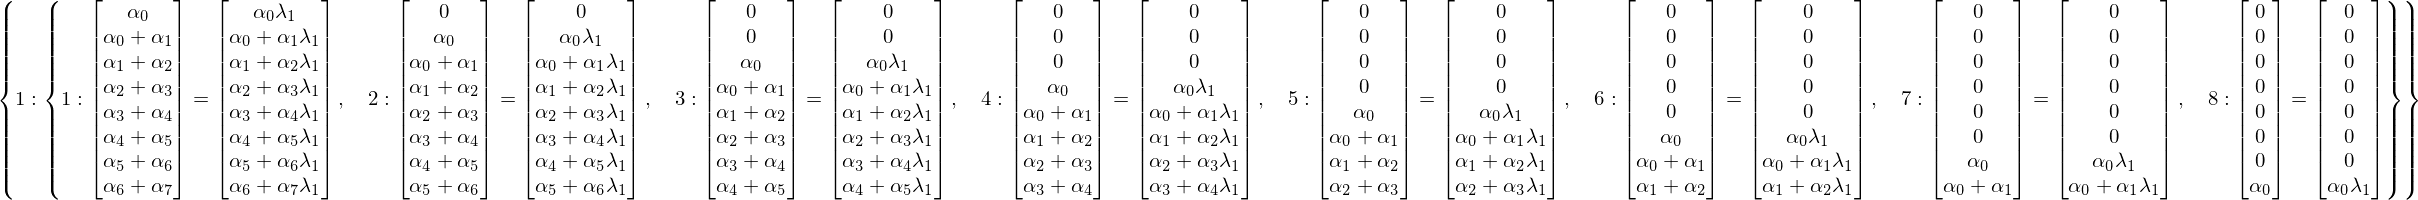

In [33]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(J.rhs, M_space_v)#,post=lambda i: i.radsimp().factor())
eqs

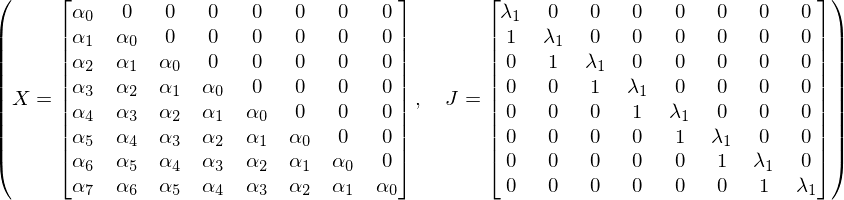

In [34]:
miniblocks = Jordan_blocks(eigendata)
X, JJ = Jordan_normalform(eigendata, matrices=(J.rhs, M_space_v, miniblocks))
X_lambda = Lambda(v_vector, X.rhs)
X, JJ

In [35]:
f = Function('f')
f_abstract = Eq(f(t), f(t), evaluate=False)
f_abstract

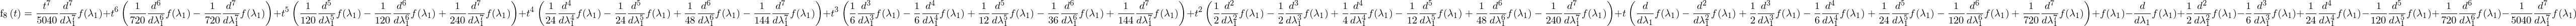

In [37]:
g_abstract = Hermite_interpolation_polynomial(f_abstract, eigendata, Phi_polynomials)
g_abstract

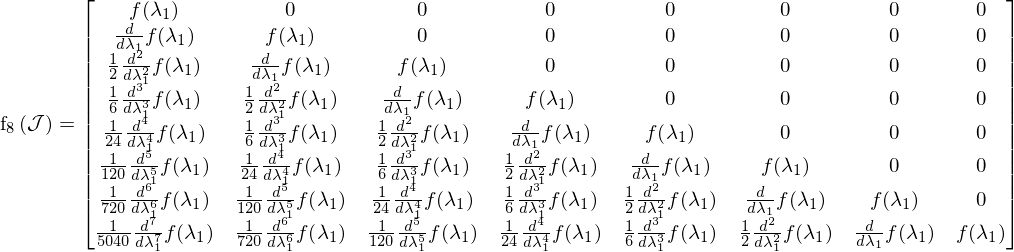

In [40]:
Jsym, e_sym = symbols('J'), IndexedBase(r'\boldsymbol{e}')
with lift_to_matrix_function(g_abstract) as G_abstract:
    J_abstract = G_abstract(J)
J_abstract

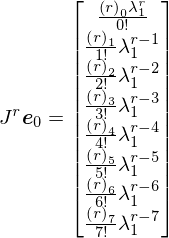

In [42]:
J_pow = J_abstract.rhs.subs({f:Lambda(x, x**r)}).applyfunc(lambda i: i.doit().factor().powsimp())
J_pow_first_col_ff = Matrix(m, 1, lambda n, _: lamda_indexed[1]**(r-n) * ff(r, n, evaluate=False) / factorial(n, evaluate=False))
assert J_pow[:,0] == J_pow_first_col_ff.doit()
Eq(Jsym**r * e_sym[0], J_pow_first_col_ff, evaluate=False)

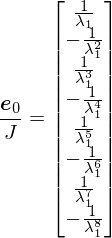

In [43]:
J_inverse = J_abstract.rhs.subs({f:Lambda(x, 1/x)}).applyfunc(lambda i: i.doit().factor())
Eq(Jsym**(-1) * e_sym[0], J_inverse[:,0],evaluate=False)

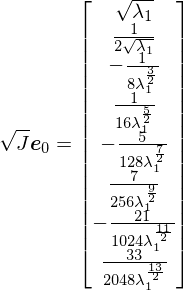

In [44]:
J_sqrt = J_abstract.rhs.subs({f:Lambda(x, sqrt(x))}).applyfunc(lambda i: i.doit())
Eq(sqrt(Jsym)*e_sym[0], J_sqrt[:,0], evaluate=False)

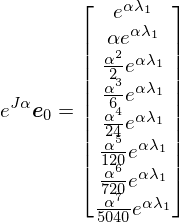

In [45]:
J_exp = J_abstract.rhs.subs({f:Lambda(x, exp(Symbol(r'\alpha')*x))}).applyfunc(lambda i: i.doit())
Eq(exp(alpha*Jsym)*e_sym[0] ,J_exp[:,0],evaluate=False)

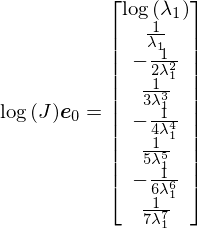

In [46]:
J_log = J_abstract.rhs.subs({f:Lambda(x, log(x))}).applyfunc(lambda i: i.doit())
Eq(log(Jsym)*e_sym[0], J_log[:,0], evaluate=False)

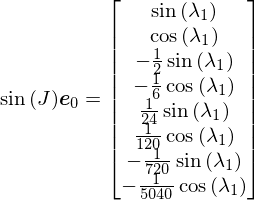

In [47]:
J_sin = J_abstract.rhs.subs({f:Lambda(x, sin(x))}).applyfunc(lambda i: i.doit())
Eq(sin(Jsym)*e_sym[0], J_sin[:,0],evaluate=False)

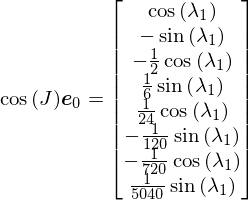

In [48]:
J_cos = J_abstract.rhs.subs({f:Lambda(x, cos(x))}).applyfunc(lambda i: i.doit())
Eq(cos(Jsym)*e_sym[0], J_cos[:,0],evaluate=False)

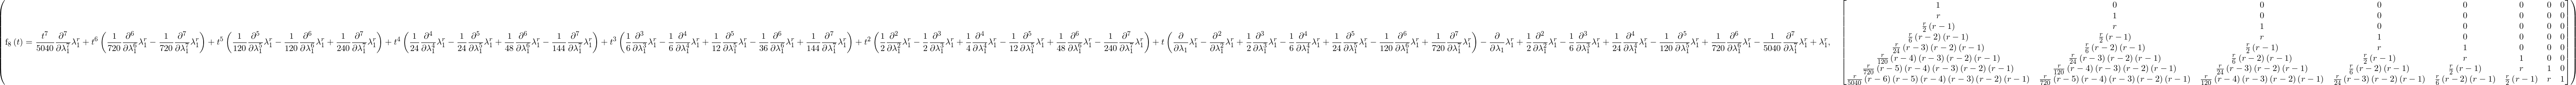

In [52]:
# previous cells can be computed using the poly g as well
g_pow = g_abstract.subs({f:Lambda(x, x**r)})#.simplify()
with lift_to_matrix_function(g_pow) as G_pow:
    J_pow = G_pow(J)
g_pow, J_pow.rhs.applyfunc(lambda i: i.subs(eigenvals).doit().factor())

# $\mathcal{P}$

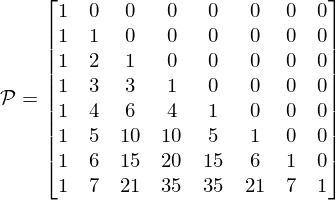

In [53]:
m=8
P = define(Symbol(r'\mathcal{P}'), Matrix(m,m,binomial))
P

In [55]:
eigendata = spectrum(P)
data, eigenvals, multiplicities = eigendata.rhs
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
cmatrices = component_matrices(P, Phi_polynomials)

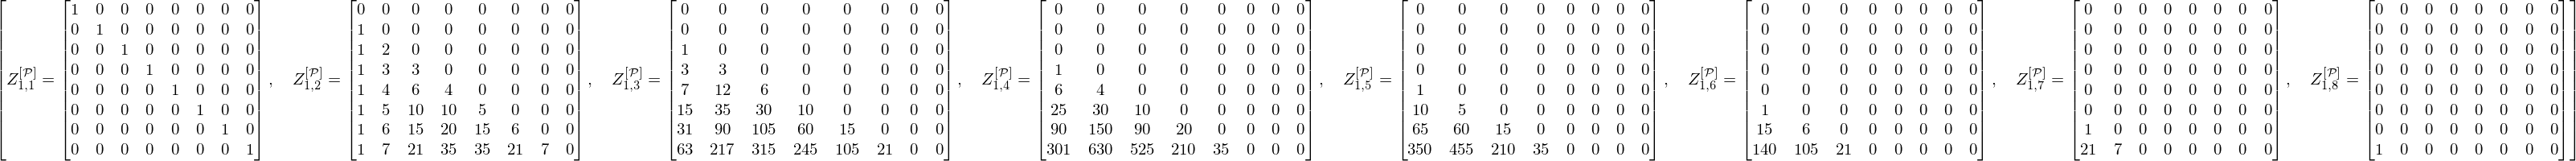

In [56]:
list(cmatrices.values()) # pretty print

In [57]:
alpha_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(alpha_vector)

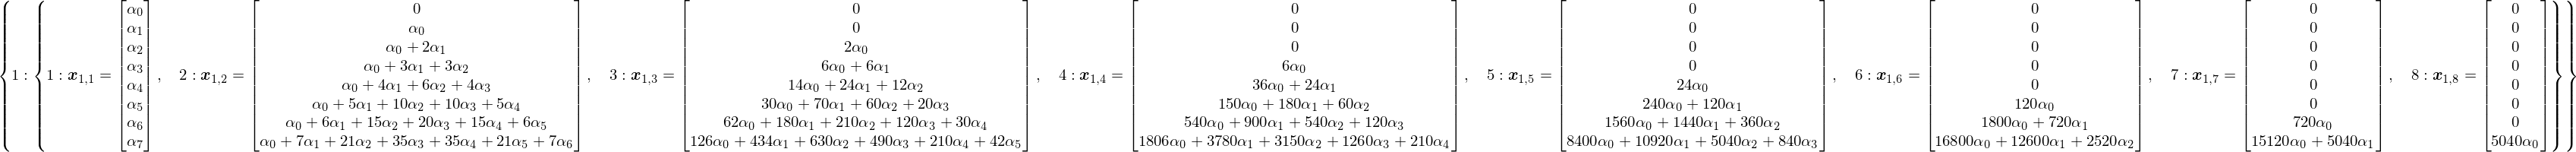

In [58]:
M_space_v

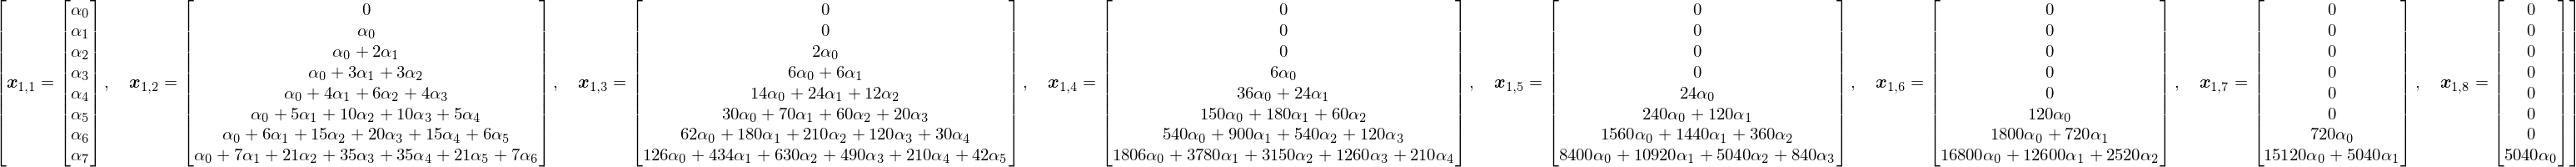

In [59]:
[eq for i, xs in M_space_v.items() for eq in xs.values()] # pretty print

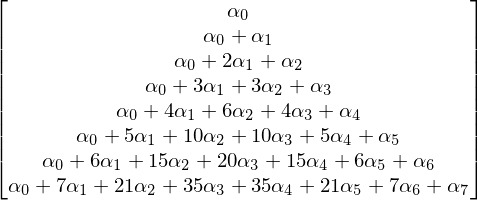

In [60]:
P.rhs*alpha_vector

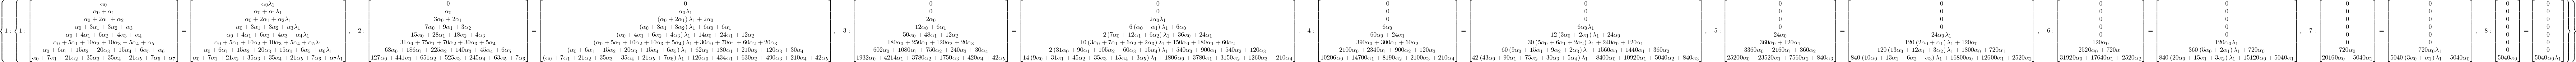

In [61]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(P.rhs, M_space_v)
eqs

In [62]:
miniblocks = Jordan_blocks(eigendata)
X_P, J_P = Jordan_normalform(eigendata, matrices=(P.rhs, M_space_v, miniblocks))
X_P_lambda = Lambda(alpha_vector, X_P.rhs)

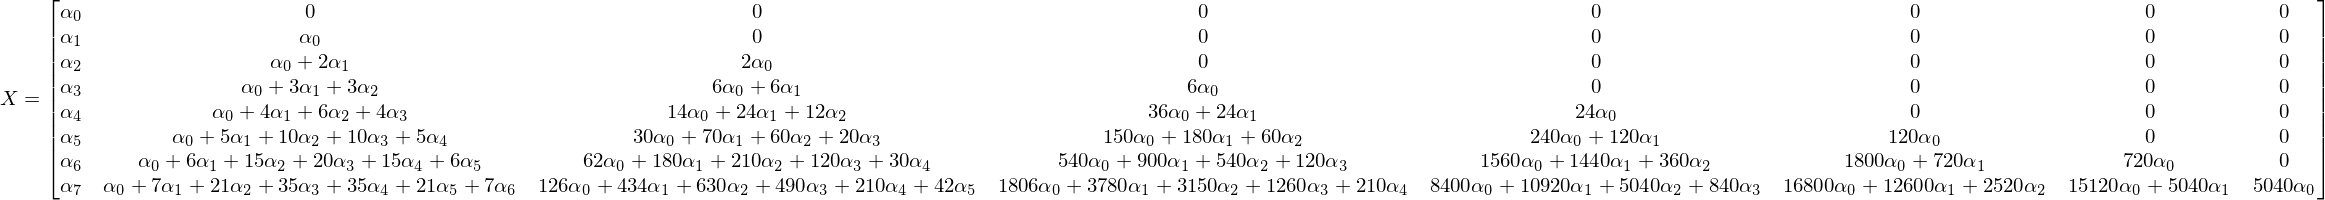

In [63]:
X_P

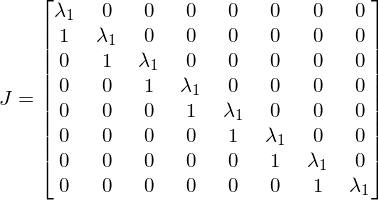

In [64]:
J_P

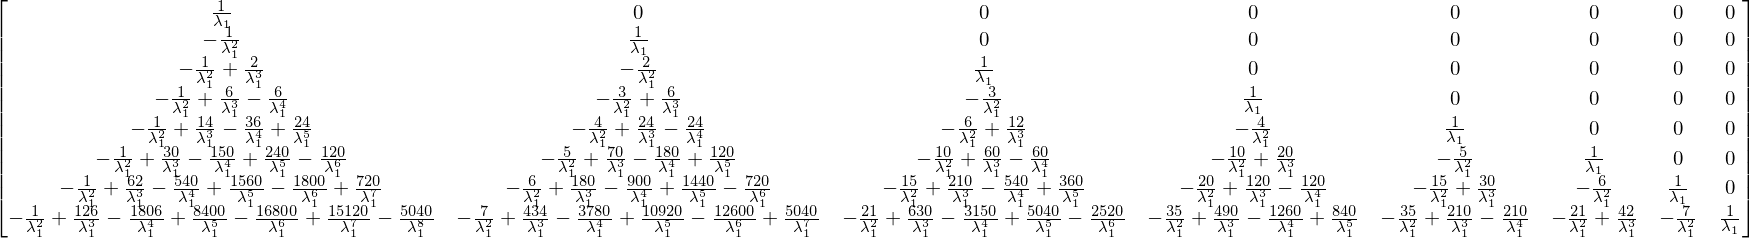

In [65]:
P_inverse_sim =  (X_P.rhs * J_inverse * X_P.rhs**(-1)).applyfunc(lambda i: i.simplify().expand())
P_inverse_sim

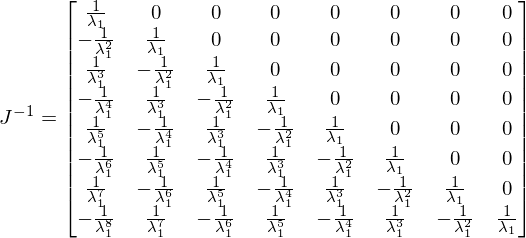

In [66]:
Eq(symbols(r'J^{-1}'), J_inverse, evaluate=False)

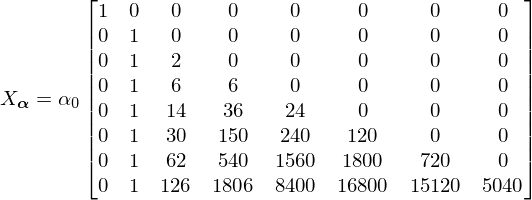

In [67]:
X_P_alpha0 = X_P_lambda(*([alpha[0]]+[0]*(m-1)))
Eq(symbols(r'X_{\boldsymbol{\alpha}}'), Mul(alpha[0],X_P_alpha0.applyfunc(lambda i: i/alpha[0]),evaluate=False), evaluate=False)

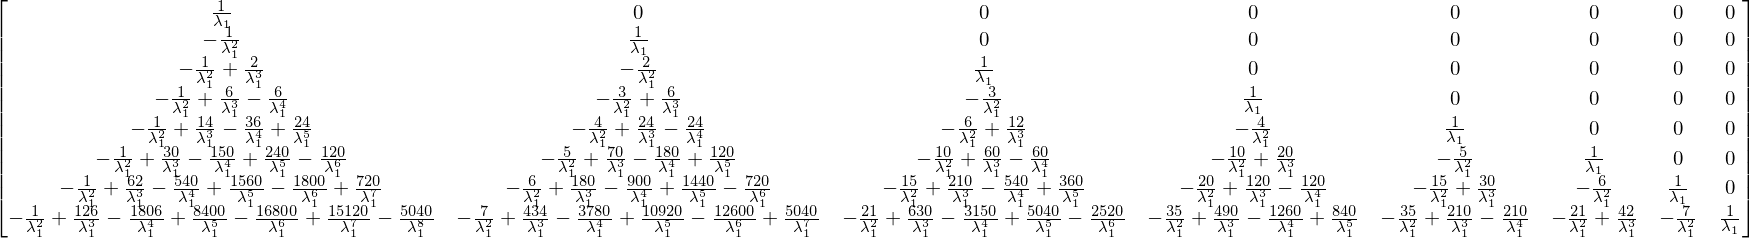

In [68]:
(X_P_alpha0 * J_inverse * X_P_alpha0**(-1)).expand()

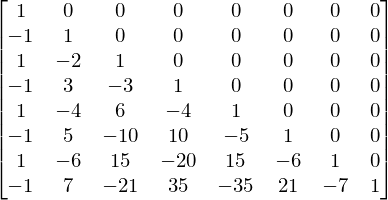

In [69]:
P_inverse_sim.subs(eigenvals)

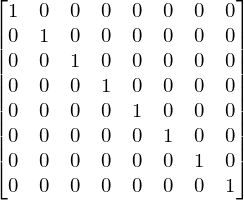

In [71]:
P.rhs*P_inverse_sim.subs(eigenvals)

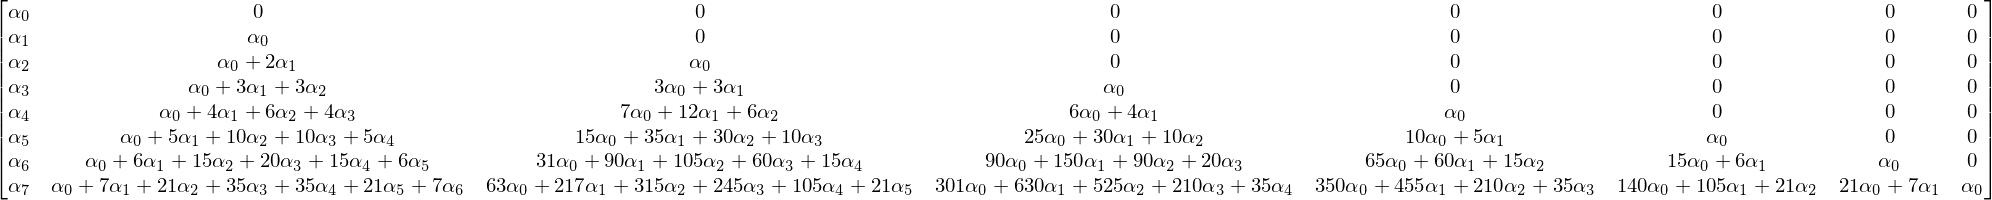

In [72]:
X_P.rhs * Iexp**(-1)

In [73]:
inspect(X_P.rhs)

nature(is_ordinary=False, is_exponential=False)

In [74]:
inspect((X_P.rhs * Iexp**(-1))[:5, :5])

nature(is_ordinary=False, is_exponential=True)

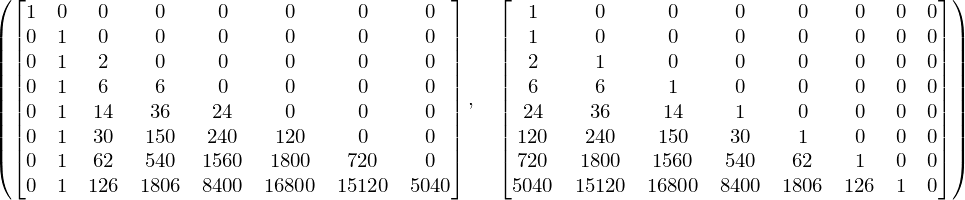

In [170]:
selection = [1] + ([0]*(m-1))
X_P_1_0s = X_P_lambda(*selection)# * Iexp**(-1)
X_P_1_0s, Matrix(m, m, columns_symmetry(X_P_1_0s))

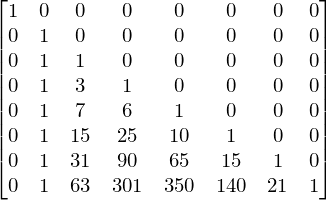

In [76]:
X_P_1_0s*Iexp**(-1)

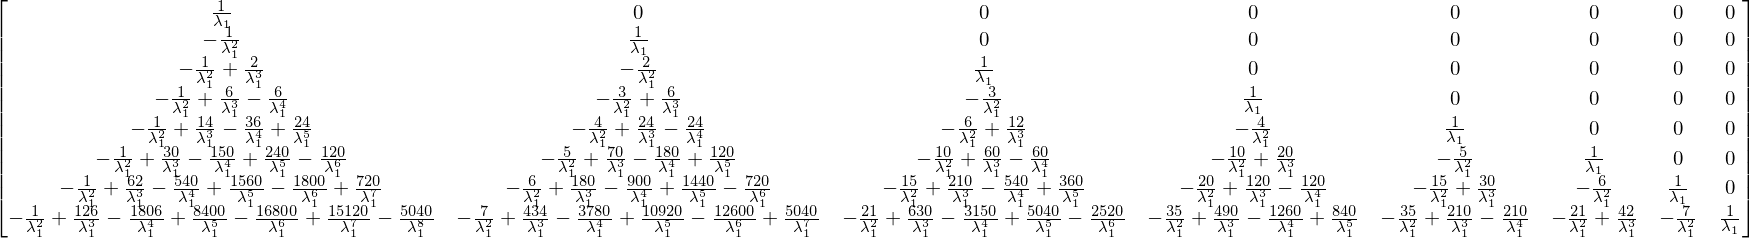

In [77]:
X_P_1_0s * J_inverse * X_P_1_0s**(-1)

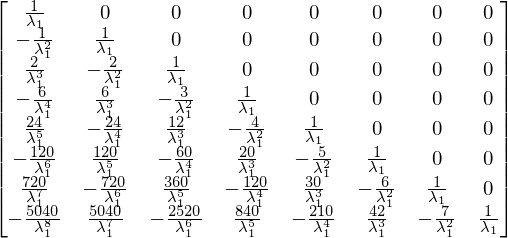

In [79]:
(Iexp * J_abstract.rhs * Iexp**(-1)).subs({f:Lambda(x, 1/x)}).doit()

In [80]:
inspect(_)

nature(is_ordinary=False, is_exponential=True)

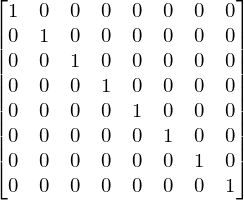

In [81]:
Iexp * Matrix(m, m, identity_matrix()) * Iexp**(-1) # because `Iexp` is diagonal

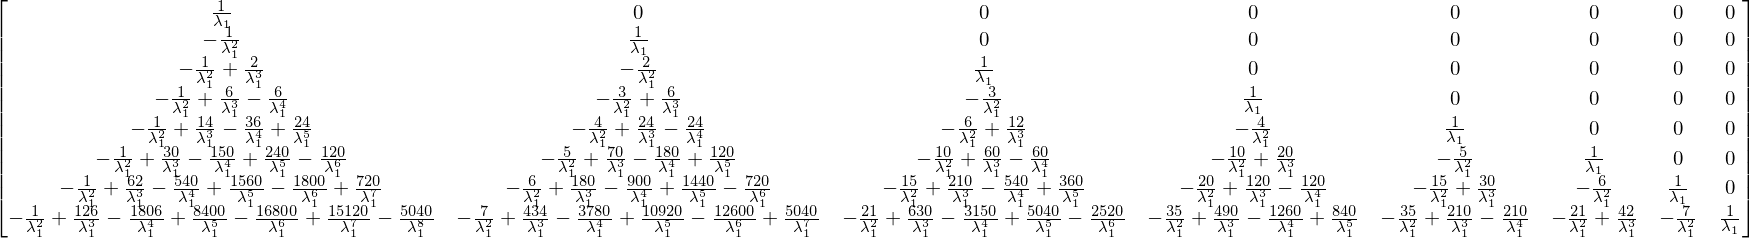

In [83]:
(X_P_1_0s * J_inverse * X_P_1_0s**(-1))

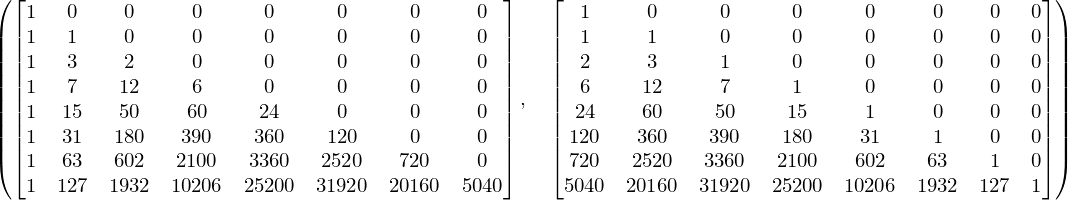

In [169]:
selection = [1] * m
X_P_1s = X_P_lambda(*selection) #* Iexp**(-1)
X_P_1s, Matrix(m, m, columns_symmetry(X_P_1s))

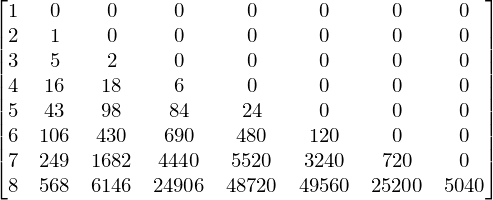

In [164]:
selection = list(range(1,m+1))
X_P_1s = X_P_lambda(*selection) #* Iexp**(-1)
X_P_1s

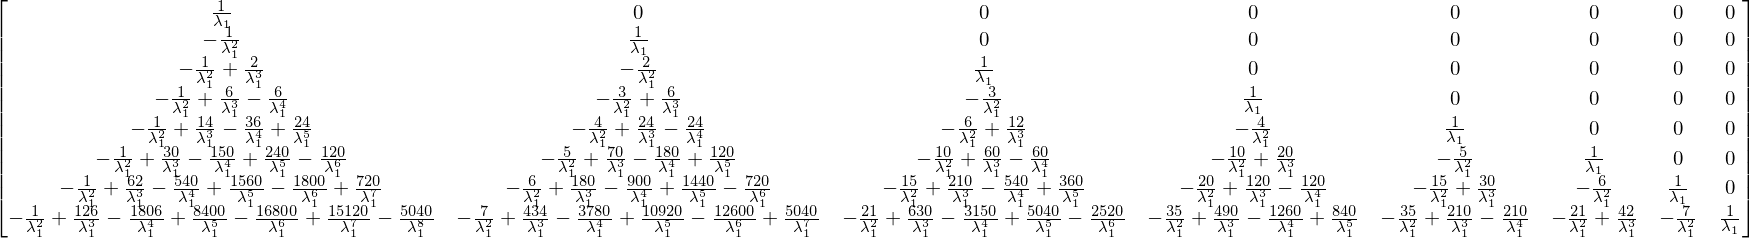

In [85]:
(X_P_1s * J_inverse * X_P_1s**(-1))

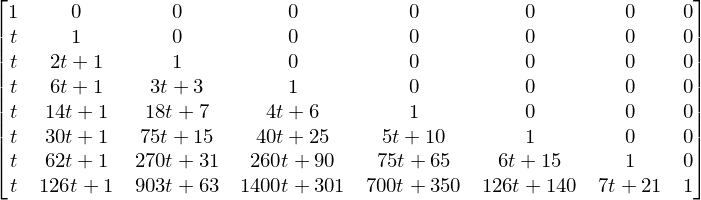

In [86]:
selection = [1] + ([t]*(m-1))
X_P_lambda(*selection) * Iexp**(-1)

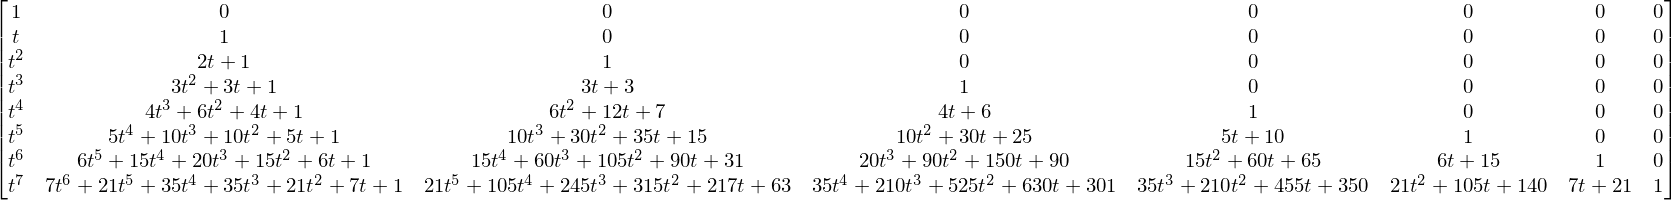

In [87]:
selection = [t**i for i in range(m)]
X_P_lambda(*selection) * Iexp**(-1)

In [88]:
# FX=XJ
assert ((P.rhs*X_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_P.rhs*J_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

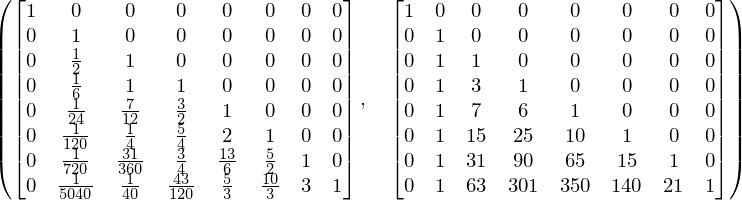

In [92]:
C = riordan_matrix_by_convolution(m,
                                  Eq(Function('d')(t), 1), 
                                  Eq(Function('h')(t), (exp(t)-1).series(t, n=m).removeO()))
Matrix(m, m, C), Matrix(m, m, riordan_matrix_exponential(C))

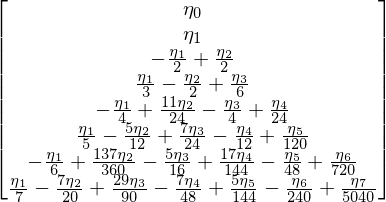

In [93]:
eta = IndexedBase(r'\eta')
(X_P.rhs**(-1) * Matrix(m,1,lambda n,k: eta[n])).subs({alpha[i]:0 if i else 1 for i in range(m)}).applyfunc(simplify)

In [94]:
(X_P.rhs**(-1) * Matrix(m,1,lambda n,k: alpha[n])).applyfunc(simplify)

# $\mathcal{C}$

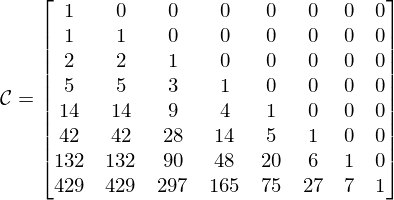

In [108]:
m = 8
A = Eq(Function('A')(t), 1/(1-t))
C = define(Symbol(r'\mathcal{C}'), Matrix(m, m, riordan_matrix_by_AZ_sequences(m, (A, A))))
C

In [112]:
eigendata = spectrum(C)
data, eigenvals, multiplicities = eigendata.rhs
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
cmatrices = component_matrices(C, Phi_polynomials)

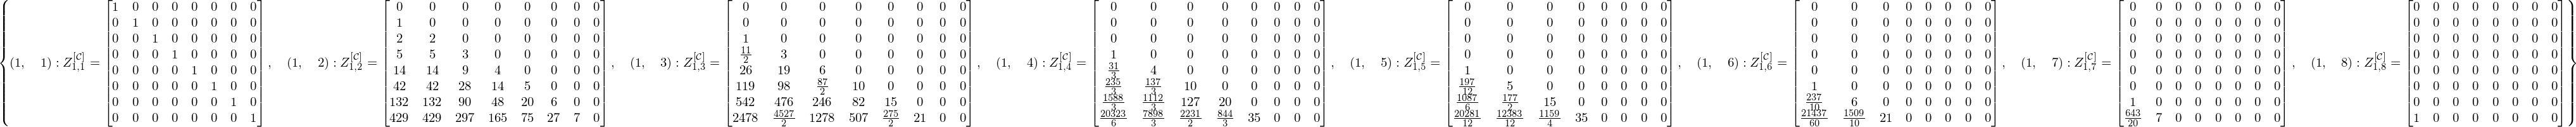

In [113]:
cmatrices

In [114]:
beta_vector = Matrix(m, 1, lambda i, _: beta[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(beta_vector)

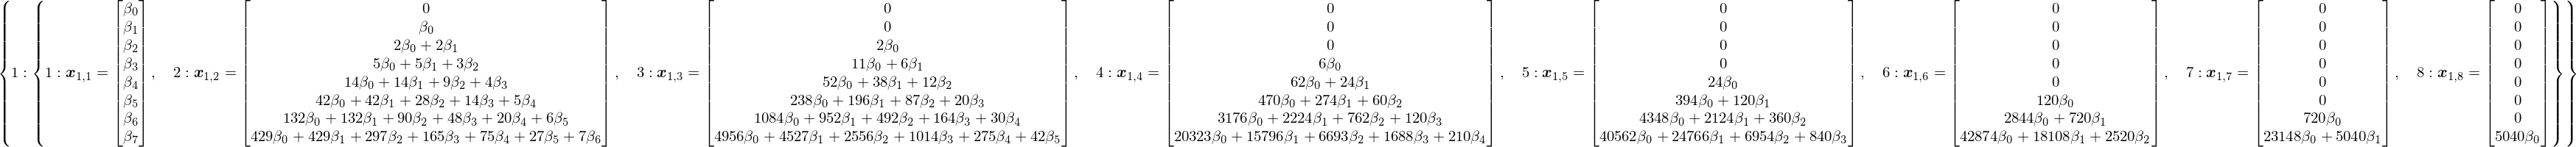

In [115]:
M_space_v

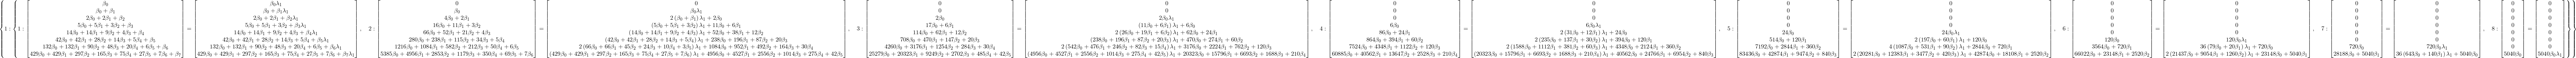

In [116]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(C.rhs, M_space_v)
eqs

In [117]:
miniblocks = Jordan_blocks(eigendata)
X_C, J_C = Jordan_normalform(eigendata, matrices=(C.rhs, M_space_v, miniblocks))
X_C_lambda = Lambda(beta_vector, X_C.rhs)

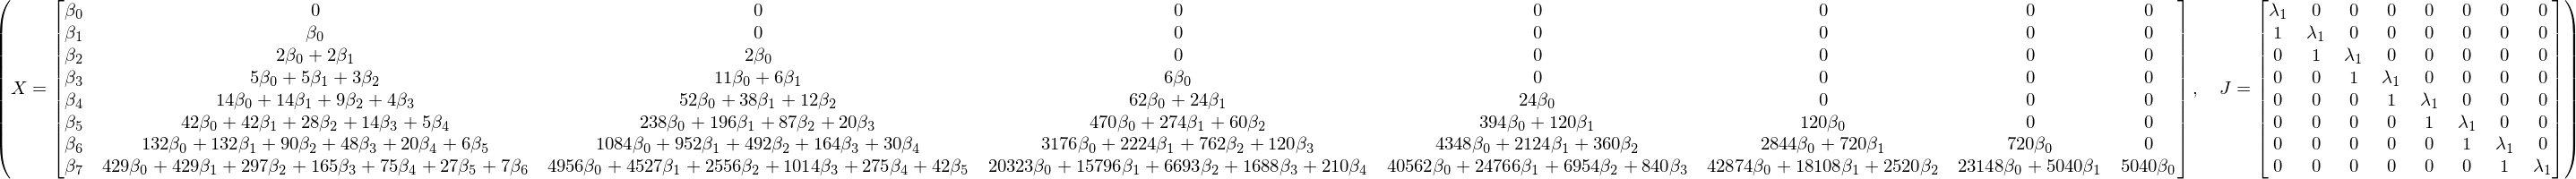

In [118]:
X_C, J_C

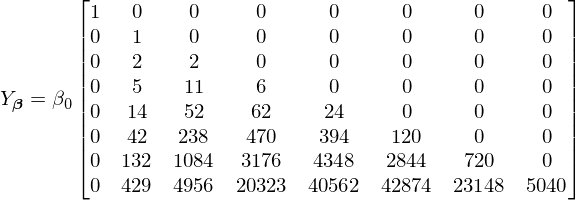

In [119]:
X_C_beta0 = X_C_lambda(*([beta[0]]+([0]*(m-1))))
Eq(symbols(r'Y_{\boldsymbol{\beta}}'), Mul(beta[0], X_C_beta0.applyfunc(lambda i: i/beta[0]), evaluate=False), evaluate=False)

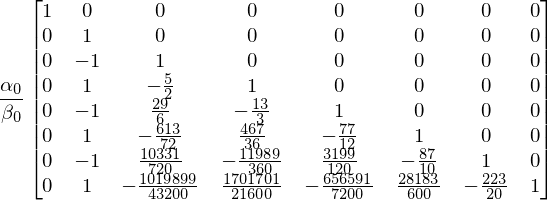

In [120]:
X_C_inverse = X_C_beta0**(-1)
XY_P_C = X_P_alpha0 * X_C_inverse
Mul(alpha[0]/beta[0], XY_P_C.applyfunc(lambda i: i*beta[0]/alpha[0]), evaluate=False)

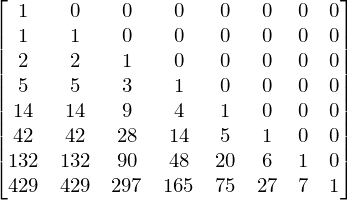

In [122]:
XY_P_C**(-1) * P.rhs * XY_P_C

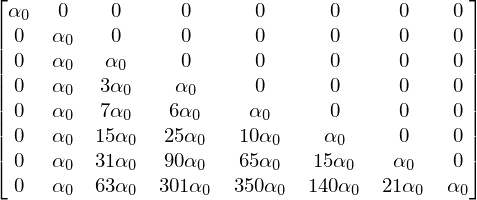

In [123]:
unknowns = {(n,k): beta[n,k] for n in range(m) for k in range(n+1)}
sols = solve(X_P_alpha0- Matrix(m, m, lambda n,k: unknowns.get((n,k), 0))*Iexp, list(unknowns.values()))
Matrix(m, m, lambda n,k: sols.get(beta[n,k], 0))

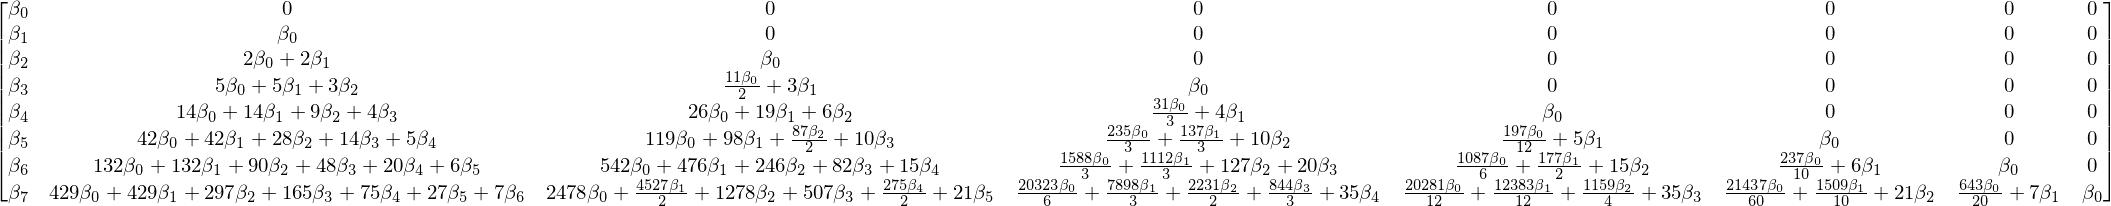

In [124]:
unknowns = {(n,k): beta[n,k] for n in range(m) for k in range(n+1)}
sols = solve(X_C.rhs- Matrix(m, m, lambda n,k: unknowns.get((n,k), 0))*Iexp, list(unknowns.values()))
Matrix(m, m, lambda n,k: sols.get(beta[n,k], 0))

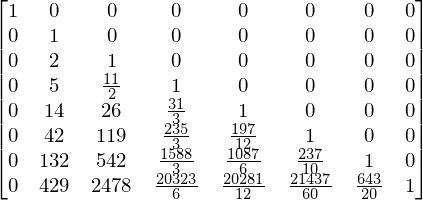

In [125]:
_.subs({beta[i]:0 if i else 1 for i in range(m)})

In [127]:
assert (XY_P_C**(-1) * P.rhs**r * XY_P_C).simplify() == (C.rhs**r).applyfunc(simplify)

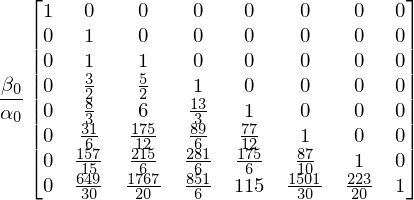

In [128]:
YX_C_P = X_C_beta0 * X_P_alpha0**(-1)
Mul(beta[0]/alpha[0], YX_C_P.applyfunc(lambda i: i*alpha[0]/beta[0]), evaluate=False)

In [131]:
assert YX_C_P**(-1)*C.rhs*YX_C_P == P.rhs

In [136]:
assert XY_P_C * YX_C_P == Matrix(m, m, identity_matrix())

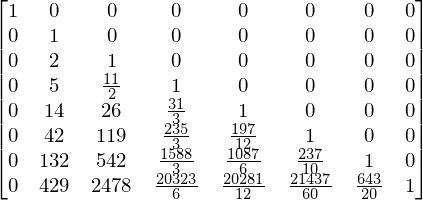

In [137]:
selection = [1] + ([0]*(m-1))
X_C_lambda(*selection) * Iexp**(-1)

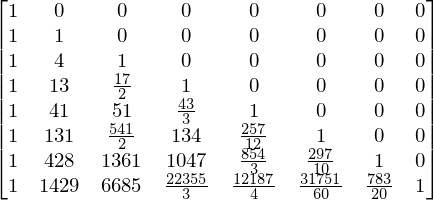

In [138]:
selection = [1] * m
X_C_lambda(*selection) * Iexp**(-1)

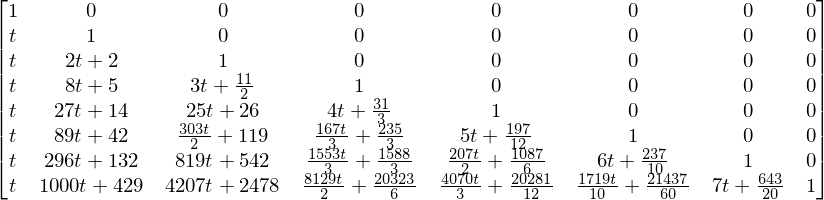

In [139]:
selection = [1] + ([t]*(m-1))
X_C_lambda(*selection) * Iexp**(-1)

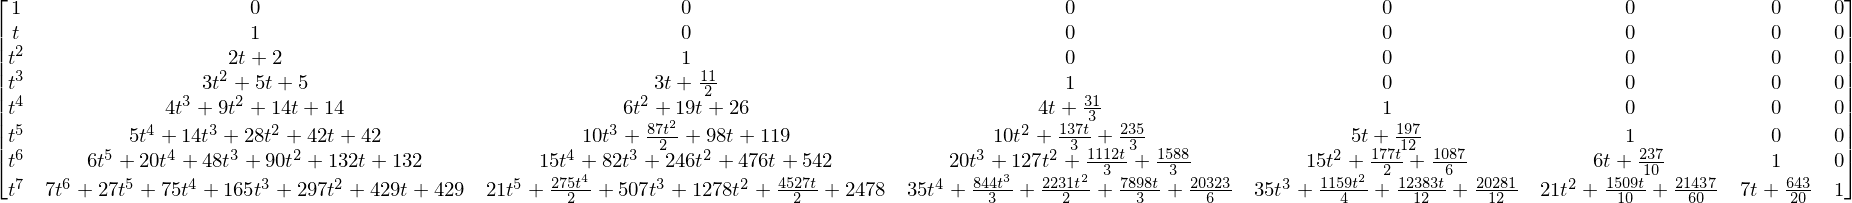

In [140]:
selection = [t**i for i in range(m)]
X_C_lambda(*selection) * Iexp**(-1)

In [141]:
# FX=XJ
assert ((C.rhs*X_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_C.rhs*J_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

# $\mathcal{S}$

In [142]:
from sympy.functions.combinatorial.numbers import stirling

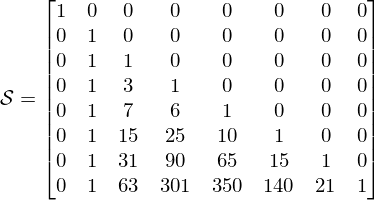

In [143]:
m=8
S2 = define(Symbol(r'\mathcal{S}'), Matrix(m, m, lambda n,k: stirling(n,k, kind=2)))
S2

In [145]:
eigendata = spectrum(S2)
data, eigenvals, multiplicities = eigendata.rhs
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
cmatrices = component_matrices(S2, Phi_polynomials)

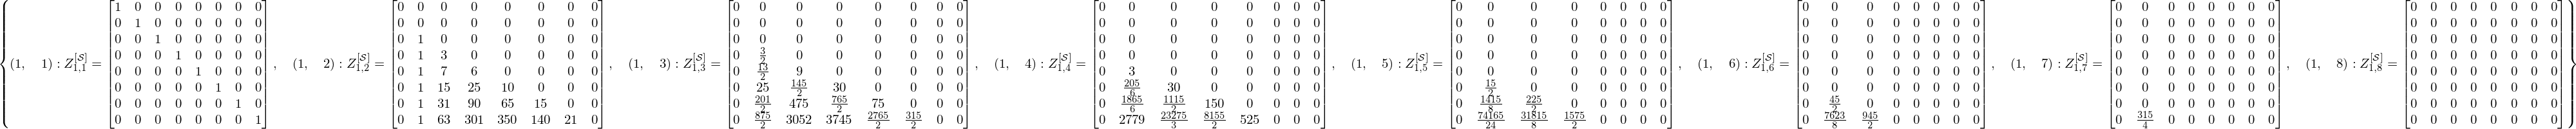

In [146]:
cmatrices

In [147]:
gamma = IndexedBase(r'\gamma')
gamma_vector = Matrix(m, 1, lambda i, _: gamma[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(gamma_vector)

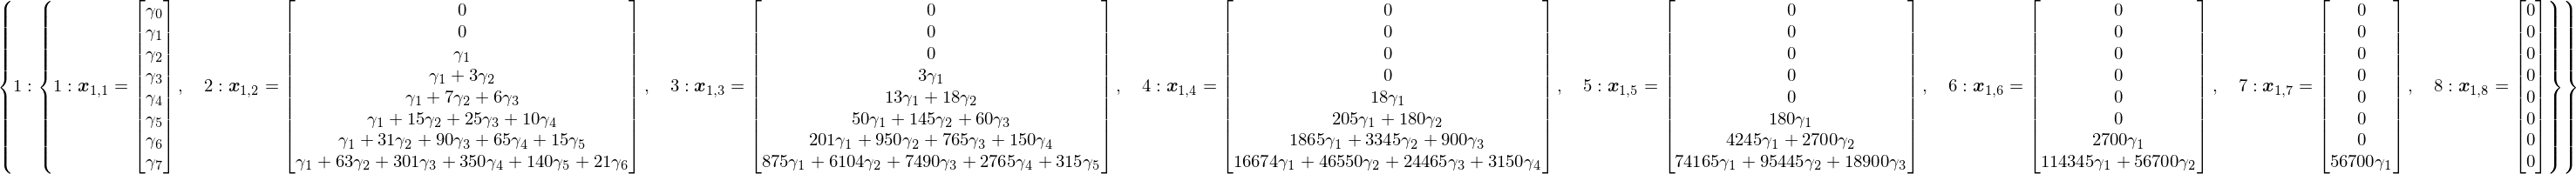

In [148]:
M_space_v

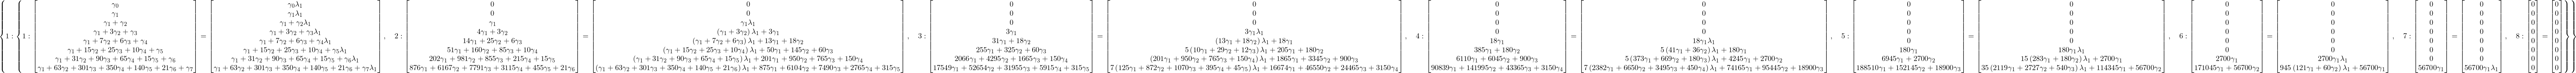

In [149]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(S2.rhs, M_space_v, check=True)
eqs

In [150]:
miniblocks = Jordan_blocks(eigendata)
X_S2, J_S2 = Jordan_normalform(eigendata, matrices=(S2.rhs, M_space_v, miniblocks))
X_S2_lambda = Lambda(gamma_vector, X_S2.rhs)

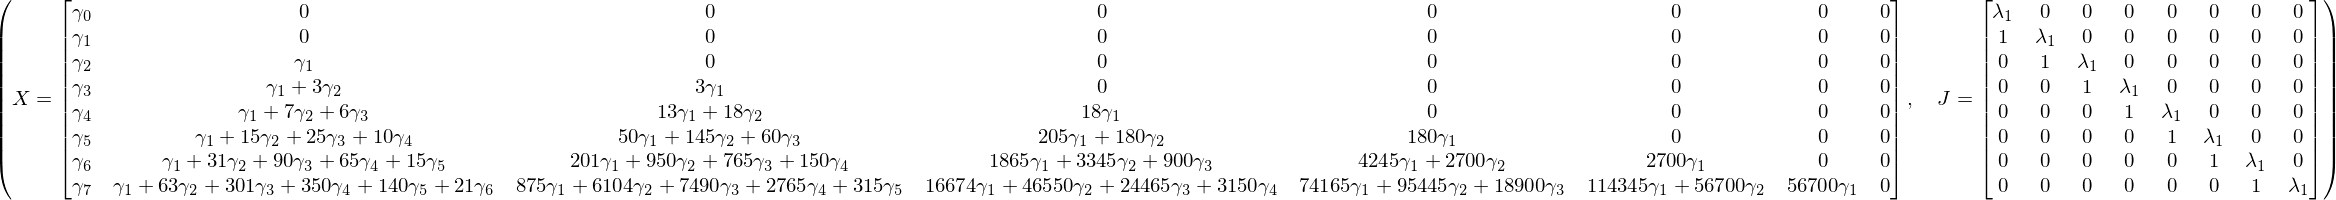

In [151]:
X_S2, J_S2

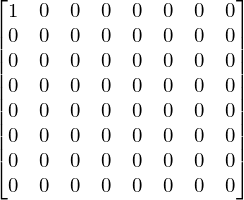

In [152]:
selection = [1] + ([0]*(m-1))
X_S2_lambda(*selection) * Iexp**(-1)

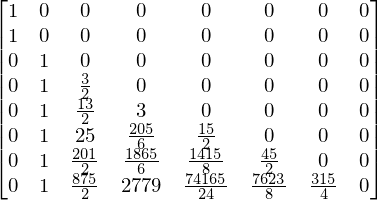

In [155]:
selection = [1,1] + ([0]*(m-2))
X_S2_lambda(*selection) * Iexp**(-1)

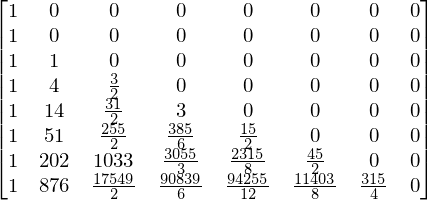

In [156]:
selection = [1] * m
X_S2_lambda(*selection) * Iexp**(-1)

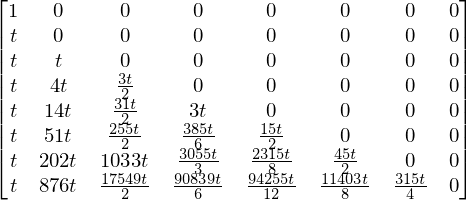

In [157]:
selection = [1] + ([t]*(m-1))
X_S2_lambda(*selection) * Iexp**(-1)

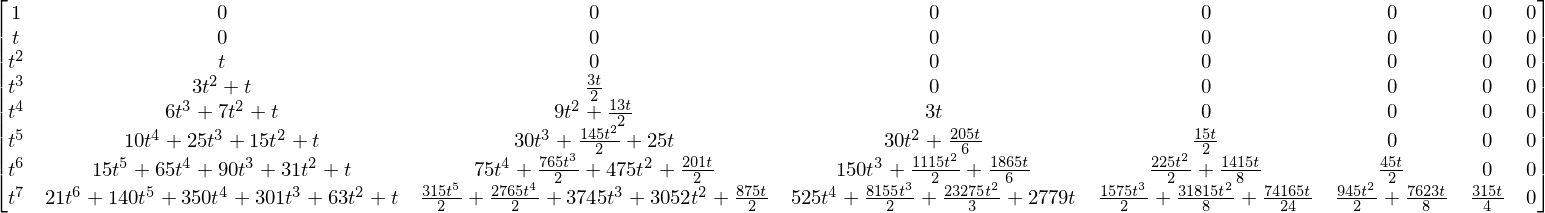

In [158]:
selection = [t**i for i in range(m)]
X_S2_lambda(*selection) * Iexp**(-1)

In [159]:
# FX=XJ
assert ((P.rhs*X_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_P.rhs*J_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

---

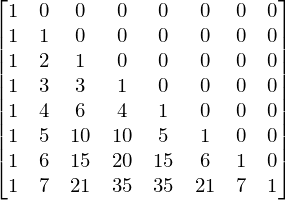

In [161]:
(X_P.rhs*X_C.rhs**(-1)*C.rhs*X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

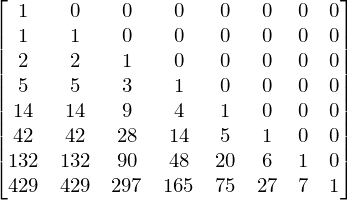

In [162]:
(X_C.rhs*X_P.rhs**(-1)*P.rhs*X_P.rhs*X_C.rhs**(-1)).applyfunc(simplify)

In [171]:
(X_S2.rhs*X_P.rhs**(-1)*P.rhs*X_P.rhs*X_S2.rhs**(-1)).applyfunc(simplify)

ValueError: Matrix det == 0; not invertible.

In [172]:
X_CP = (X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

In [ ]:
inspect(X_CP) # takes long to evaluate

In [175]:
L = Lambda(list(alpha_vector)+list(beta_vector), X_CP)

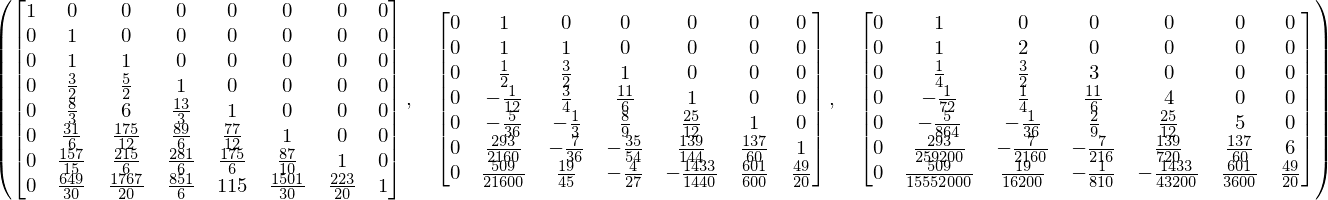

In [176]:
X_CP_v = L(*([1]+[0]*(m-1)+[1]+[0]*(m-1)))
X_CP_v, production_matrix(X_CP_v), production_matrix(X_CP_v, exp=True)

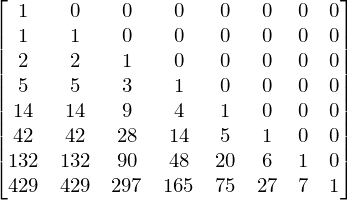

In [178]:
X_CP_v * P.rhs * X_CP_v**(-1)

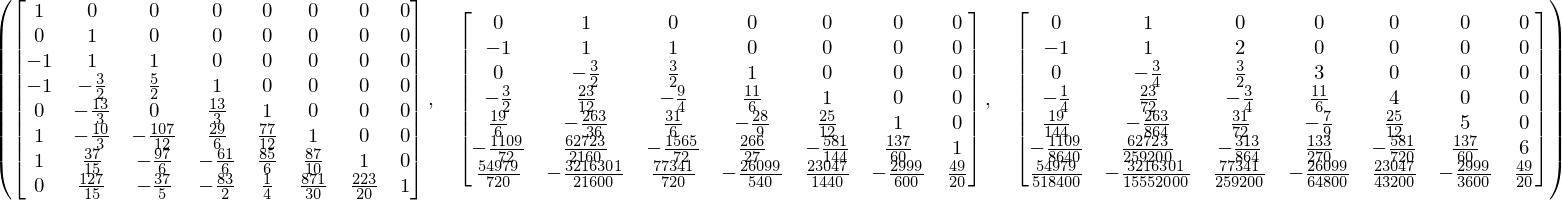

In [179]:
X_CP_v = L(*([x]*(2*m)))
X_CP_v, production_matrix(X_CP_v), production_matrix(X_CP_v, exp=True)

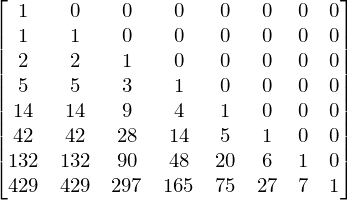

In [180]:
X_CP_v * P.rhs * X_CP_v**(-1)

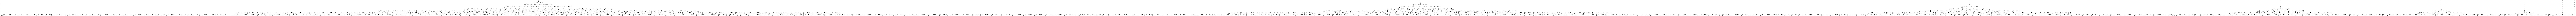

In [181]:
((X_P.rhs*X_C.rhs**(-1))**(-1)).applyfunc(simplify)

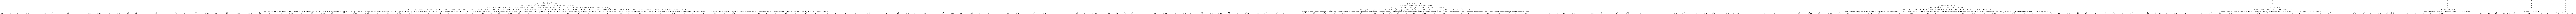

In [182]:
((X_C.rhs*X_P.rhs**(-1))**(-1)).applyfunc(simplify)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.